# Natural Language Processing with RNNs - Toxic Comment Classification

Outline:

1. Download and explore the data
2. Prepare the data for training
3. Build a recurrent neural network
4. Train & evaluate the model
5. Make predictions & submit to Kaggle

## Download & Explore Data

Outline:
1. Download the data from Kaggle
2. Load data into Pandas dataframes
3. Explore the dataset

In [1]:
import os

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [3]:
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 78% 41.0M/52.6M [00:00<00:00, 101MB/s] 
100% 52.6M/52.6M [00:00<00:00, 108MB/s]


In [4]:
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


In [5]:
import pandas as pd

In [6]:
raw_df = pd.read_csv('data/train.csv.zip')
test_df = pd.read_csv('data/test.csv.zip')
sub_df = pd.read_csv('data/sample_submission.csv.zip')

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
raw_df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
1700,049d9929949207c6,"Thankyou, Gareth, that's very kind. Is that mo...",0,0,0,0,0,0
83697,dffb9df950b9962f,To get to the NSA or CIA one has to pass a gov...,0,0,0,0,0,0
86714,e7eaa75efa0b0d5b,"""\nPlease read through the sources before comm...",0,0,0,0,0,0
132907,c7035579e323a7d0,"""\n\n Rational scepticism project \n\nI'm inte...",0,0,0,0,0,0
41336,6e3e74c1f8348436,Liberal Arts\nThis isn't good history:\nThe Ro...,0,0,0,0,0,0
86663,e7ca5c3cb731f72d,Mentally Ill\nMongo are you one of the ill fan...,1,0,0,0,0,0
134685,d05f3d668a6571ec,Nipple \n\nNipple Nipple Nipple Nipple Nipple ...,1,0,1,0,0,0
86320,e6e2c37e52347437,I've added in some replies. Thanks for the hel...,0,0,0,0,0,0
74770,c802b00b92c4921d,Problem is they are YOUR definitions and nobod...,0,0,0,0,0,0
117144,7200062915d2d5d8,""", 14 March 2008 (UTC)\n\nI don't like the ter...",0,0,0,0,0,0


In [9]:
raw_df.comment_text.values[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [10]:
target_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [11]:
for col in target_cols:
    print(raw_df[col].value_counts(normalize=True))

toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64
severe_toxic
0    0.990004
1    0.009996
Name: proportion, dtype: float64
obscene
0    0.947052
1    0.052948
Name: proportion, dtype: float64
threat
0    0.997004
1    0.002996
Name: proportion, dtype: float64
insult
0    0.950636
1    0.049364
Name: proportion, dtype: float64
identity_hate
0    0.991195
1    0.008805
Name: proportion, dtype: float64


In [12]:
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [13]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.5,0.5,0.5,0.5,0.5,0.5
153160,fffd7a9a6eb32c16,0.5,0.5,0.5,0.5,0.5,0.5
153161,fffda9e8d6fafa9e,0.5,0.5,0.5,0.5,0.5,0.5
153162,fffe8f1340a79fc2,0.5,0.5,0.5,0.5,0.5,0.5


## Prepare the Dataset for Training

Outline:
- Create a vocabulary using TorchText
- Create training & validation sets
- Create PyTorch dataloaders

### Create a Vocabulary

In [14]:
from torchtext.data.utils import get_tokenizer

In [15]:
tokenizer = get_tokenizer('basic_english')

In [16]:
sample_comment = raw_df.comment_text.values[0]

In [17]:
sample_comment

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [18]:
sample_comment_tokens = tokenizer(sample_comment)
sample_comment_tokens[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica']

In [19]:
from torchtext.vocab import build_vocab_from_iterator

This line of code is applying a function called `tokenizer` to each element in the `comment_text` column of the DataFrame `raw_df`.

Here's a breakdown of what's happening:

- `raw_df.comment_text`: This part is selecting the `comment_text` column from the DataFrame `raw_df`.
- `.map(tokenizer)`: The `map()` function is a pandas DataFrame method that applies a function to each element of the selected column. In this case, it's applying the `tokenizer` function.

The `tokenizer` function is typically used to convert text into a list of tokens. A token is a single "unit" of meaning in the text, such as a word or a phrase. The specifics of what the `tokenizer` function does would depend on its definition, which isn't provided in this line of code.

The result, `comment_tokens`, is a new pandas Series where each element is the tokenized version of the corresponding element in `raw_df.comment_text`. This is often a step in the preprocessing of text data for natural language processing (NLP) tasks.

In [20]:
comment_tokens = raw_df.comment_text.map(tokenizer)

In [21]:
comment_tokens

0         [explanation, why, the, edits, made, under, my...
1         [d, ', aww, !, he, matches, this, background, ...
2         [hey, man, ,, i, ', m, really, not, trying, to...
3         [more, i, can, ', t, make, any, real, suggesti...
4         [you, ,, sir, ,, are, my, hero, ., any, chance...
                                ...                        
159566    [and, for, the, second, time, of, asking, ,, w...
159567    [you, should, be, ashamed, of, yourself, that,...
159568    [spitzer, umm, ,, theres, no, actual, article,...
159569    [and, it, looks, like, it, was, actually, you,...
159570    [and, ., ., ., i, really, don, ', t, think, yo...
Name: comment_text, Length: 159571, dtype: object

In [22]:
VOCAB_SIZE = 1500

In [23]:
unk_token = '<unk>'
pad_token = '<pad>'

In [24]:
vocab = build_vocab_from_iterator(comment_tokens,
                                  specials=[unk_token, pad_token],
                                  max_tokens=VOCAB_SIZE)

.get_itos(): This method, when called on a Vocabulary object, returns a list of tokens (strings) in the vocabulary. The position of each token in the list represents its numerical identifier. For example, if vocab.get_itos() returns ['<pad>', 'the', 'a', 'and'], then the word ‘the’ has an id of 1, ‘a’ has an id of 2, and so on.

In [25]:
l = vocab.get_itos()

In [26]:
l[:20]

['<unk>',
 '<pad>',
 '.',
 'the',
 ',',
 'to',
 'i',
 'of',
 'and',
 "'",
 'you',
 'a',
 'is',
 'that',
 'it',
 'in',
 '!',
 'for',
 'this',
 'not']

The get_stoi() method returns a dictionary where the keys are the unique tokens (words) in the vocabulary and the values are the corresponding unique integer indices12. This dictionary is useful for converting token strings into their numerical identifiers when you’re preparing your text data for a machine learning model1

In [28]:
dict_of_vocab = vocab.get_stoi()
d = dict_of_vocab

In [29]:
# Now, let's take a "slice" of the first 3 items
sliced_dict = {k: d[k] for k in list(d.keys())[:3]}

print(sliced_dict)  # Output: {'a': 1, 'b': 2, 'c': 3}


{'threats': 1499, 'referred': 1498, 'strongly': 1495}


In [31]:
vocab[pad_token]

1

In [30]:
vocab[unk_token]

0

## set_default_index

In the line of code you provided, vocab.set_default_index(vocab[unk_token]), the set_default_index() method is being used to set the default index to the index of the “unknown” token (unk_token) in the vocabulary. This means that if a token that is not in the vocabulary is queried, the index of the “unknown” token will be returned3.

This is particularly useful in natural language processing tasks where you might encounter words that were not present in your training data (and thus are not in your vocabulary). By setting a default index for unknown tokens, you can handle these cases more gracefully without your program crashing due to an unknown word

In [32]:
vocab.set_default_index(vocab[unk_token])

In [33]:
vocab['this']

18

Here the 'harcore' is not in our library hence we get default index value as output

In [34]:
vocab['harcore']

0

In [36]:
sample_comment_tokens

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 'hardcore',
 'metallica',
 'fan',
 'were',
 'reverted',
 '?',
 'they',
 'weren',
 "'",
 't',
 'vandalisms',
 ',',
 'just',
 'closure',
 'on',
 'some',
 'gas',
 'after',
 'i',
 'voted',
 'at',
 'new',
 'york',
 'dolls',
 'fac',
 '.',
 'and',
 'please',
 'don',
 "'",
 't',
 'remove',
 'the',
 'template',
 'from',
 'the',
 'talk',
 'page',
 'since',
 'i',
 "'",
 'm',
 'retired',
 'now',
 '.',
 '89',
 '.',
 '205',
 '.',
 '38',
 '.',
 '27']

In [35]:
sample_indices = vocab.lookup_indices(sample_comment_tokens)
sample_indices[:10]

[667, 85, 3, 140, 142, 185, 39, 663, 0, 0]

In [37]:
sample_comment_recovered = vocab.lookup_tokens(sample_indices)
sample_comment_recovered[:10]

['explanation',
 'why',
 'the',
 'edits',
 'made',
 'under',
 'my',
 'username',
 '<unk>',
 '<unk>']

### Create Training & Validation Sets

- Define a custom Pytorch Dataset
- Pass raw data into the dataset
- Split the PyTorch Dataset

<Axes: ylabel='Frequency'>

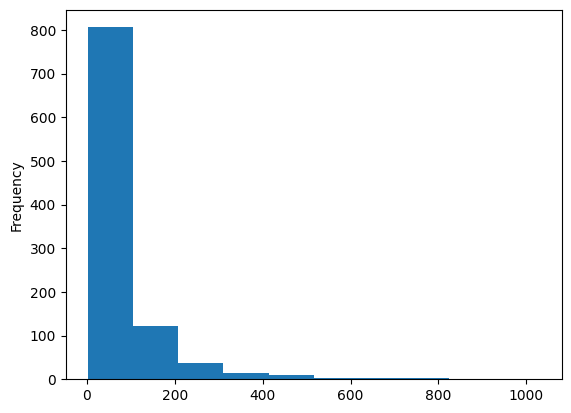

In [ ]:
raw_df.comment_text.sample(1000).map(tokenizer).map(len).plot(kind='hist')

In [38]:
MAX_LENGTH = 150

In [39]:
def pad_tokens(tokens):
    if (len(tokens) >= MAX_LENGTH):
        return tokens[:MAX_LENGTH]
    else:
        return tokens + [pad_token] * (MAX_LENGTH - len(tokens))

In [40]:
import torch

In [41]:
from torch.utils.data import Dataset

In [42]:
class JigsawDataset(Dataset):
    def __init__(self, df, is_test=False):
        self.df = df
        self.is_test = is_test

    def __getitem__(self, index):
        comment_text = self.df.comment_text.values[index]
        comment_tokens = pad_tokens(tokenizer(comment_text))
        input = torch.tensor(vocab.lookup_indices(comment_tokens))
        if self.is_test:
            target = torch.tensor([0,0,0,0,0,0]).float()
        else:
            target = torch.tensor(self.df[target_cols].values[index]).float()
        return input, target

    def __len__(self):
        return len(self.df)

## __getitem__()

The __getitem__ method is a special method in Python that gets called when you access an element of an object using square bracket notation.

for an example you have created an object ob1 from class named hello.the class hello has    'def __getitem__(self, index):' this so when you called like this

ob1[0] , This is invoke -> def __getitem__(self, index):



In [43]:
raw_ds = JigsawDataset(raw_df)

In [44]:
raw_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [45]:
raw_ds[0]

(tensor([ 667,   85,    3,  140,  142,  185,   39,  663,    0,    0, 1287,   96,
          329,   27,   57,    0,    9,   31,    0,    4,   61,    0,   21,   71,
            0,  158,    6,    0,   45,  130, 1167,    0,    0,    2,    8,   55,
           70,    9,   31,  253,    3,  369,   41,    3,   50,   38,  155,    6,
            9,   81,    0,   99,    2,    0,    2,    0,    2,    0,    2, 1122,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

In [46]:
from torch.utils.data import random_split

In [47]:
VAL_FRAC = 0.25

## class JigsawDataset(Dataset)



The `random_split` class in PyTorch expects its first argument to be an instance of a `Dataset` object.


 A `Dataset` object in PyTorch is any Python class that implements the `__getitem__` and `__len__` methods.

In your `JigsawDataset` class:
- The `__getitem__` method is used to get the data sample and its corresponding target at a given index.
- The `__len__` method returns the number of samples in the dataset.

When you pass `raw_ds` (which is a `JigsawDataset` object) to the `random_split`, it knows how to access the data and its corresponding target because the `JigsawDataset` class has defined the `__getitem__` method. It also knows how many data samples there are because the `JigsawDataset` class has defined the `__len__` method.

So, even though `raw_ds` is not a DataFrame, it's still a valid input to create a `random_split` because it's an instance of a class that inherits from `Dataset` and correctly implements the required methods. This is a common pattern in PyTorch for loading and batching data.



In [48]:
train_ds, val_ds = random_split(raw_ds, [1-VAL_FRAC, VAL_FRAC])

In [49]:
len(raw_ds), len(train_ds), len(val_ds)

(159571, 119679, 39892)

In [50]:
test_ds = JigsawDataset(test_df, is_test=True)

In [51]:
test_df.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [52]:
test_ds[0]

(tensor([   0,  636,    0,  649,   12,   69,    0,   93,   10,    9,  169,  359,
           23,    0,   89,   30,   10,    8,    0,   10, 1488,    0,    2,    2,
            2,    6,   68,  636,    0,    0,    0,  690,    0,    8,  105,   10,
            5,    0,   39,  419,   10,  699,    0,   46,    2,    0,  649,   12,
           47,    0,   15,    0,  668,  439,    2,  443,    0,   13,  332,   21,
          167,    2,    8,    0,   12,  251,    0,   62,    0,   59,   34,   11,
            0,  171,    2,    2,    2,    0,  690,    0,  105,  226,  160,  490,
           95,    2,    4,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
            1,    1,    1,  

### Create PyTorch Dataloaders

In [53]:
from torch.utils.data import DataLoader

In [54]:
BATCH_SIZE = 256

In [55]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=8, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE*2, num_workers=8, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [56]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])


## Build a Recurrent Neural Network

Outline:
1. Understand how recurrent neural networks work
2. Create a recurrent neural network
3. Pass some through the network

In [57]:
import torch.nn as nn
import torch.functional as F

In [ ]:
vocab[pad_token]

1

## emb_layer

emb_layer is used to convert each word in a sentece to a vector.

here 256 means vector size which means each word in a input sentence is converted in to 256 size vector.

here 1 is padding token.if provide the padding vector do not contribute to the gradient decent.

detail explanation -: in our input sentence we have padding token. So wehen we input each of token in to embedding layer each token is converted in to 256 vector so the padding token is also converted in to 256 vector.

But this padding vector is not necessary fr gradient decent so that's why we not include it in back propergation

In [59]:
emb_layer = nn.Embedding(VOCAB_SIZE, 256, 1)

## nn.RNN



Parameters
input_size – The number of expected features in the input x (here each word is represent using 256 vector hence the input size is 256)

hidden_size – The number of features in the hidden state h

num_layers – Number of recurrent layers. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results. Default: 1

nonlinearity – The non-linearity to use. Can be either 'tanh' or 'relu'. Default: 'tanh'

bias – If False, then the layer does not use bias weights b_ih and b_hh. Default: True

batch_first – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False

dropout – If non-zero, introduces a Dropout layer on the outputs of each RNN layer except the last layer, with dropout probability equal to dropout. Default: 0

bidirectional – If True, becomes a bidirectional RNN. Default: False

In [ ]:
rnn_layer = nn.RNN(256, 128, 1, batch_first=True)

In [ ]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    emb_out = emb_layer(b_inputs)
    print('emb_out.shape', emb_out.shape)

    rnn_out, hn = rnn_layer(emb_out)
    print('rnn_out.shape', rnn_out.shape)
    print('hn.shape', hn.shape)
    print(rnn_out[:,-1,:].shape)
    print(rnn_out.shape)

    break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
emb_out.shape torch.Size([256, 150, 256])
rnn_out.shape torch.Size([256, 150, 128])
hn.shape torch.Size([1, 256, 128])
torch.Size([256, 128])
torch.Size([256, 150, 128])


In [ ]:
!pip install pytorch_lightning --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 62.8 MB/s eta 0:00:00


In [ ]:
import pytorch_lightning as pl

In [ ]:
import torch.nn.functional as F

In [ ]:
import numpy as np

In [ ]:
class JigsawModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.emb = nn.Embedding(VOCAB_SIZE, 256, 1)
        self.lstm = nn.LSTM(256, 128, 1, batch_first=True)
        self.linear = nn.Linear(128, 6)
        self.learning_rate = 0.001

    def forward(self, x):
        out = self.emb(x)
        out, hn = self.lstm(out)
        out = F.relu(out[:,-1,:])
        out = self.linear(out)
        return out

    def training_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        loss = F.binary_cross_entropy(probs, targets)
        return loss

    def validation_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        loss = F.binary_cross_entropy(probs, targets)
        return loss.item()

    def validation_epoch_end(self, validation_step_outputs):
        loss = np.mean(validation_step_outputs)
        print("Epoch #{}; Loss: {:4f} ".format(self.current_epoch, loss))

    def predict_step(self, batch, batch_idx):
        inputs, targets = batch
        outputs = self(inputs)
        probs = torch.sigmoid(outputs)
        return probs

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

In [ ]:
model = JigsawModel()

## Explanation for  ,out = F.relu(out[:,-1,:])

 out, hn = self.lstm(out)

 out put shape of lstm =  (seq_len, batch, num_directions * hidden_size)





1.   seq_len -> number of words in sentence
2.   batch   -> batch size
3.   num_directions -> if we use bidirectional lstm num_directions = 2  
     otherwise num directions = 1

4.   hidden_size = hidden state size



Sure, let's consider a simple example where we have a batch of 2 sentences, each of length 3 (i.e., each sentence contains 3 words), and we're using a bidirectional LSTM with a hidden size of 4. Here's how it might look:

First, let's assume our sentences are represented as follows after preprocessing (like tokenization and numericalization):

Sentence 1: [5, 9, 2]
Sentence 2: [6, 1, 8]

Here, each number represents a word in the sentence (specifically, it's the index of the word in the vocabulary).

Now, let's pass these sentences through an LSTM. The LSTM will output a tensor for each sentence that contains the hidden states of the LSTM at each time step. Since we're using a bidirectional LSTM, the hidden state at each time step is a concatenation of the hidden states from the forward LSTM and the backward LSTM. If the hidden size of the LSTM is 4, then the size of the hidden state at each time step is 8 (since it's a concatenation of the forward and backward hidden states).

So, the output of the LSTM might look something like this:

```
out = [
  # For sentence 1
  [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],  # Time step 1
   [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],  # Time step 2
   [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]], # Time step 3

  # For sentence 2
  [[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1],  # Time step 1
   [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2],  # Time step 2
   [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]]  # Time step 3
]
```

Here, `out` is a 3D tensor with shape `(seq_len, batch, num_directions * hidden_size)`, or in this case, `(3, 2, 8)`. Each inner list of size 8 is the output features from the LSTM at a particular time step for a particular sentence.

When we pass data in to a fully connected layer we only interested in last set ofputs for a sentence. In this case([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] and
[0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3])

that's why, we use out[:,-1,:] as input to the F.relu() here we are selecting the last output(time step 3).

This last output has seen the all words in sentence hence we are only interested in it, When we passing data to fully connected layers.


In [ ]:
for batch in train_dl:
    b_inputs, b_targets = batch
    print('b_input.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)

    outputs = model(b_inputs)
    print('outputs.shape', outputs.shape)

    probs = torch.sigmoid(outputs)
    loss = F.binary_cross_entropy(probs, b_targets)
    print('Loss', loss)
    break

b_input.shape torch.Size([256, 150])
b_targets.shape torch.Size([256, 6])
outputs.shape torch.Size([256, 6])
Loss tensor(0.6917, grad_fn=<BinaryCrossEntropyBackward0>)


## Train and Evaluate the Model

In [ ]:
trainer = pl.Trainer(max_epochs=3, accelerator='gpu', auto_lr_find=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
trainer.tune(model, train_dl)

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.00478630092322638
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_50b3f325-e61c-4318-8d53-dfd48c1ccde0.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/.lr_find_50b3f325-e61c-4318-8d53-dfd48c1ccde0.ckpt


{'lr_find': <pytorch_lightning.tuner.lr_finder._LRFinder at 0x7f9249b40550>}

In [ ]:
model.learning_rate

0.00478630092322638

In [ ]:
trainer.fit(model, train_dl, val_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name   | Type      | Params
-------------------------------------
0 | emb    | Embedding | 384 K 
1 | lstm   | LSTM      | 197 K 
2 | linear | Linear    | 774   
-------------------------------------
582 K     Trainable params
0         Non-trainable params
582 K     Total params
2.330     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.691875 


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch #0; Loss: 0.073076 


Validation: 0it [00:00, ?it/s]

Epoch #1; Loss: 0.065023 


Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch #2; Loss: 0.064172 


## Make Predictions & Submit

In [ ]:
test_df.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
for batch in test_dl:
    b_inputs, b_targets = batch
    print('b_inputs.shape', b_inputs.shape)
    print('b_targets.shape', b_targets.shape)
    break

b_inputs.shape torch.Size([512, 150])
b_targets.shape torch.Size([512, 6])


In [ ]:
test_preds = trainer.predict(model, test_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 468it [00:00, ?it/s]

In [ ]:
test_preds = torch.cat(test_preds)

In [ ]:
test_preds.shape

torch.Size([153164, 6])

In [ ]:
test_preds

tensor([[9.8514e-01, 3.6960e-01, 9.3268e-01, 4.5492e-02, 8.6001e-01, 2.4571e-01],
        [6.6544e-03, 9.5455e-05, 1.4566e-03, 2.8526e-04, 2.3743e-03, 8.5336e-04],
        [9.5926e-03, 1.2386e-04, 2.3447e-03, 3.2115e-04, 2.8670e-03, 9.5028e-04],
        ...,
        [6.3757e-03, 1.0199e-04, 1.4886e-03, 3.1001e-04, 2.3857e-03, 8.5090e-04],
        [3.4499e-03, 5.9353e-05, 9.4897e-04, 1.3394e-04, 1.1450e-03, 4.0778e-04],
        [6.7744e-01, 2.3407e-02, 2.9260e-01, 1.6682e-02, 3.3222e-01, 6.3561e-02]])

In [ ]:
test_probs = torch.sigmoid(test_preds)

In [ ]:
sub_df[target_cols] = test_probs.detach().cpu().numpy()

In [ ]:
sub_df

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.728126,0.591361,0.717618,0.511371,0.702663,0.561119
1,0000247867823ef7,0.501664,0.500024,0.500364,0.500071,0.500594,0.500213
2,00013b17ad220c46,0.502398,0.500031,0.500586,0.500080,0.500717,0.500238
3,00017563c3f7919a,0.501505,0.500023,0.500328,0.500065,0.500544,0.500191
4,00017695ad8997eb,0.502008,0.500027,0.500477,0.500076,0.500646,0.500204
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,0.504916,0.500092,0.501056,0.500184,0.501764,0.500586
153160,fffd7a9a6eb32c16,0.502598,0.500037,0.500583,0.500120,0.500869,0.500291
153161,fffda9e8d6fafa9e,0.501594,0.500026,0.500372,0.500077,0.500596,0.500213
153162,fffe8f1340a79fc2,0.500862,0.500015,0.500237,0.500033,0.500286,0.500102


In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

id,toxic,severe_toxic,obscene,threat,insult,identity_hate
00001cee341fdb12,0.72812605,0.5913613,0.7176182,0.51137114,0.70266306,0.56111944
0000247867823ef7,0.5016636,0.50002384,0.5003641,0.5000713,0.5005936,0.5002134
00013b17ad220c46,0.50239813,0.500031,0.5005862,0.5000803,0.50071675,0.5002376
00017563c3f7919a,0.501505,0.50002253,0.5003276,0.50006527,0.5005442,0.500191
00017695ad8997eb,0.50200754,0.5000269,0.50047714,0.50007606,0.50064564,0.5002039
0001ea8717f6de06,0.50149107,0.50002205,0.50032103,0.50006306,0.5005344,0.50018644
00024115d4cbde0f,0.5014186,0.5000208,0.50028896,0.5000587,0.500487,0.5001697
000247e83dcc1211,0.5343304,0.50087047,0.5057776,0.50117475,0.5125339,0.503937
00025358d4737918,0.50083727,0.5000131,0.50024486,0.5000303,0.50024164,0.5000872


In [ ]:
sample_df = raw_df.sample(10)

In [ ]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
90860,f31456cb0794aa16,"""\n\n New station names - """"Shanghai East"""", ""...",0,0,0,0,0,0
152444,8d730b459bfe009b,Wikipedia:WikiProject Irish Football\nTime to ...,0,0,0,0,0,0
32021,55187866721a5da6,Eatsushi is not a pornographic site is is an e...,0,0,0,0,0,0
79605,d4f70d5da66e55eb,AZ had a fusion with another club from Alkmaar...,0,0,0,0,0,0
22370,3b07dca044d120cd,Your edit to Rapture \nThank you for experimen...,0,0,0,0,0,0
95915,0108c64b92e8d18a,""" Don't get me wrong, youre allowed to disagre...",0,0,0,0,0,0
108258,42b13c37f575362e,"""\nLinux vs GNU/Linux\n\n2004-05-31 23:45, Hi ...",0,0,0,0,0,0
100640,1aa8882346cf782c,"""FALSE. Whoever wrote them is making up quotes...",0,0,0,0,0,0
3133,087337fa7a4131d5,and i have a small penis lalalalalalalalala,1,0,0,0,0,0
86359,e6f68fd10b64a5f9,Die\nI just wanted to tell you that i hate you...,1,1,1,0,1,1


In [ ]:
sample_ds = JigsawDataset(sample_df)

In [ ]:
sample_dl = DataLoader(sample_ds, batch_size=10)

In [ ]:
sample_preds = trainer.predict(model, sample_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 468it [00:00, ?it/s]

In [ ]:
sample_probs = torch.sigmoid(sample_preds[0])

In [ ]:
(sample_probs > 0.6).int()

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [1, 0, 1, 0, 1, 0]], dtype=torch.int32)

In [ ]:
sample_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
90860,f31456cb0794aa16,"""\n\n New station names - """"Shanghai East"""", ""...",0,0,0,0,0,0
152444,8d730b459bfe009b,Wikipedia:WikiProject Irish Football\nTime to ...,0,0,0,0,0,0
32021,55187866721a5da6,Eatsushi is not a pornographic site is is an e...,0,0,0,0,0,0
79605,d4f70d5da66e55eb,AZ had a fusion with another club from Alkmaar...,0,0,0,0,0,0
22370,3b07dca044d120cd,Your edit to Rapture \nThank you for experimen...,0,0,0,0,0,0
95915,0108c64b92e8d18a,""" Don't get me wrong, youre allowed to disagre...",0,0,0,0,0,0
108258,42b13c37f575362e,"""\nLinux vs GNU/Linux\n\n2004-05-31 23:45, Hi ...",0,0,0,0,0,0
100640,1aa8882346cf782c,"""FALSE. Whoever wrote them is making up quotes...",0,0,0,0,0,0
3133,087337fa7a4131d5,and i have a small penis lalalalalalalalala,1,0,0,0,0,0
86359,e6f68fd10b64a5f9,Die\nI just wanted to tell you that i hate you...,1,1,1,0,1,1
